## Freddie Freeman Rolling Batting Average

The purpose of this notebook is to calculate the 5-game rolling batting average of Freddie Freeman to others. 

In [2]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore", "use_inf_as_na")

### Read Data

In [23]:
df = pd.read_csv('Data/freddie_freeman.csv')
df.head()

,Rk,Gcar,Gtm,Date,Tm,Unnamed: 5,Opp,Rslt,Inngs,PA,...,OPS,BOP,aLI,WPA,acLI,cWPA,RE24,DFS(DK),DFS(FD),Pos
0,1.0,1725.0,1,Mar 30,LAD,NaN,ARI,W8-2,CG,5,...,1.100,2.0,0.82,-0.020,0.81,-0.01%,0.20,10.0,12.2,1B
1,2.0,1726.0,2,Mar 31,LAD,NaN,ARI,L1-2,CG,5,...,0.522,2.0,1.82,-0.219,1.88,-0.14%,-1.28,0.0,0.0,1B
2,3.0,1727.0,3,Apr 1,LAD,NaN,ARI,W10-1,CG,4,...,0.607,2.0,0.37,0.049,0.37,0.03%,0.32,7.0,9.2,1B
3,4.0,1728.0,4,Apr 2,LAD,NaN,ARI,L1-2,CG,4,...,0.778,2.0,1.16,0.104,1.22,0.07%,0.83,8.0,9.0,1B
4,5.0,1729.0,5,Apr 3,LAD,NaN,COL,W13-4,CG,5,...,0.995,2.0,0.44,0.003,0.44,0.00%,0.34,17.0,21.4,1B


### Clean Data
Keep only the columns we need. 

In [26]:
relevant_columns = ['Gtm', 'AB', 'H']
df = df[relevant_columns]
df.rename(columns={'Gtm' : 'Game Number'}, inplace = True)
df.head()

,Game Number,AB,H
0,1,4,2
1,2,5,0
2,3,3,1
3,4,3,2
4,5,4,3


Drop rows where date in np.nan

### Calculate Batting Average

In [27]:
df['BA'] = df['H'] / df['AB']
df.head()

,Game Number,AB,H,BA
0,1,4,2,0.500000
1,2,5,0,0.000000
2,3,3,1,0.333333
3,4,3,2,0.666667
4,5,4,3,0.750000


### Calculate the moving average

In [28]:
df['rolling_BA'] = df['BA'].rolling(window = 5).mean()
df.dropna(inplace = True)
df.head()

,Game Number,AB,H,BA,rolling_BA
4,5,4,3,0.75,0.450000
5,6,2,0,0.00,0.350000
6,7,5,2,0.40,0.430000
7,8,4,1,0.25,0.413333
8,9,5,4,0.80,0.440000


## Make Chart

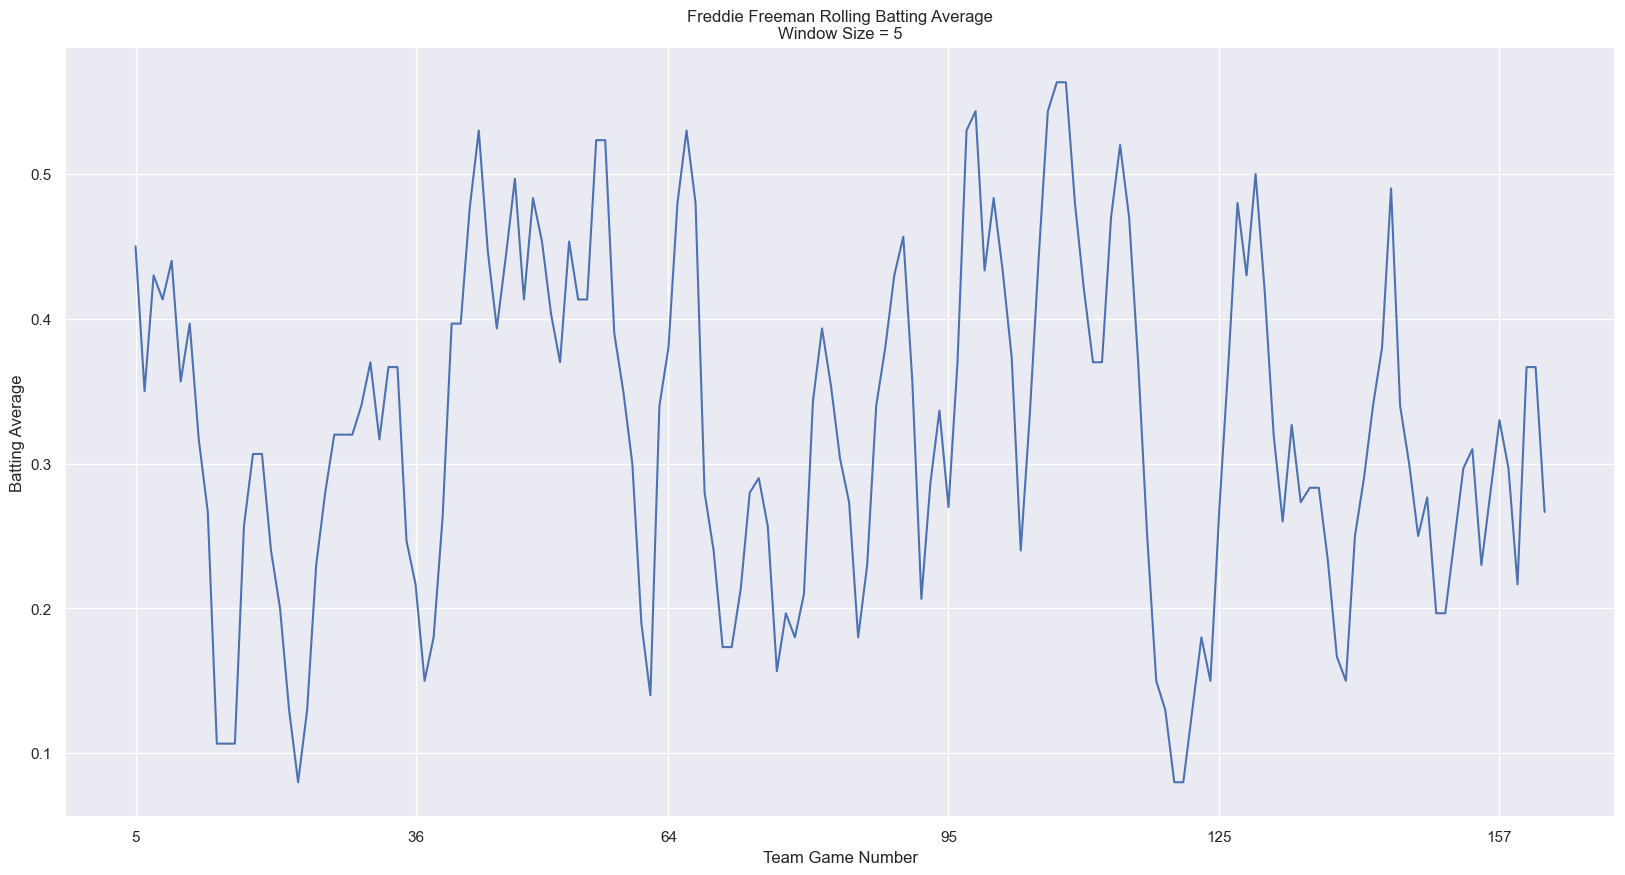

In [33]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme()
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize = (20,10))
sns.lineplot(df, x = 'Game Number', y = 'rolling_BA')
plt.ylabel('Batting Average')
plt.xlabel('Team Game Number')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.title('Freddie Freeman Rolling Batting Average\nWindow Size = 5')
plt.show()